In [0]:
import pandas as pd
imdb = pd.read_csv("https://raw.githubusercontent.com/BiaChacon/data-science-starting/master/datasets/movie_metadata.csv")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Desafio 1

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, 'Preto e Branco'), Text(0, 0, 'Colorido')]

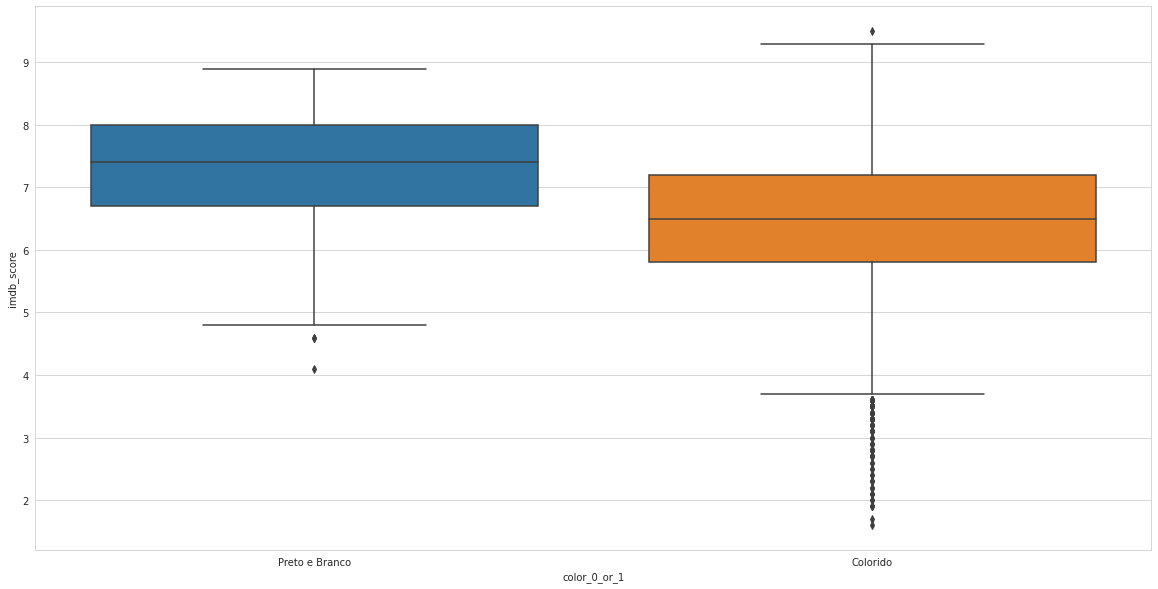

In [240]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_or_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_or_1"].value_counts()

color_or_bw.groupby("color").median()["imdb_score"]

plt.figure(figsize=(20,10))
sns.boxplot(data = color_or_bw.query("color_0_or_1 in [0,1]"), 
              x ="color_0_or_1", 
              y="imdb_score").set_xticklabels(labels=["Preto e Branco", "Colorido"])

A maioria dos filmes Preto e Branco são mais bem avaliados que os coloridos, pelo fato de serem mais antigos e poucas pessoas assistiram.

# Desafio 2 
No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


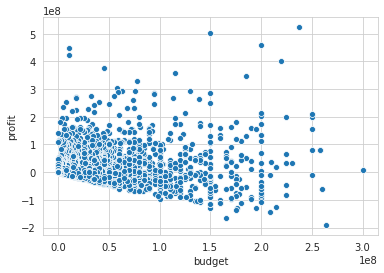

In [241]:
#trabalhar só com filmes americanos oara garantir que budget e gross estão em dolar
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

#lucro dos filmes
imdb_usa['profit'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0").dropna()
sns.scatterplot(x="budget", y="profit", data = budget_gross)

Para descobrir que filme é esse que o budget está próximo de 2.5 peguei os valores do **profit**(lucro) e subtrair pelo valor do **budget**(despesas), depois ordenei e peguei o primeiro objeto para descobrir qual filme teve o menor valor na coluna **budget_profit**

In [0]:
budget_gross['loss'] = (budget_gross['profit']) - (budget_gross['budget'])
movie_loss = budget_gross.query("budget > 0 | gross > 0").dropna()
movie = movie_loss.sort_values("loss", ascending=True).head(1)

Titulo do filme que o **budget** esta próximo de 2.5

In [243]:
movie.movie_title

5    John Carter 
Name: movie_title, dtype: object

# Desafio 3
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

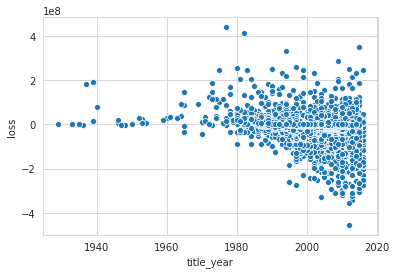

In [244]:
sns.scatterplot(x="title_year", y="loss", data = movie_loss)

Os filmes com prejuizo maior são mais recentes, como pode-se observar no gráfico que relaciona o ano do filme com o prejuizo.


# Desafio 4
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

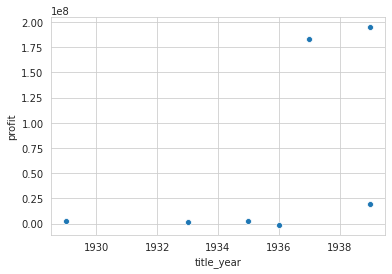

In [245]:
war2 = movie_loss.query("budget > 0 | gross > 0").dropna()
war2 = war2.query("title_year < 1940")

sns.scatterplot(x="title_year", y="profit", data = war2)

Observando o gráfico pode-se observar que dois filmes pré segunda guerra com o lucro alto. O nome dos respectivos filmes estão abaixo. 

In [246]:
 movie_war2 = war2.sort_values("profit", ascending=True).head(2)
 movie_war2.movie_title

4427    Modern Times 
4786     42nd Street 
Name: movie_title, dtype: object

# Desafio 5 

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [0]:
movie_director = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(movie_director, on="director_name")
gross_director.columns=["money", "movies_brother"]

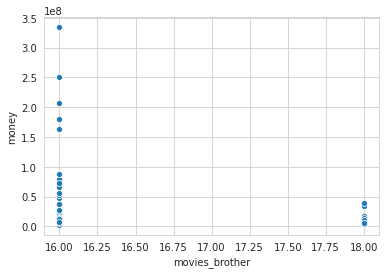

In [248]:
t = gross_director.query("movies_brother>15 & movies_brother<20")
t
sns.scatterplot(x="movies_brother", y="money", data = t)

Vendo o gráfico dos valores entre 15 e 20, consegue-se observar que os pontos estranhos tem o valor de **movies_brother** igual a 18 que corresponde realmente ao Woody Allen.

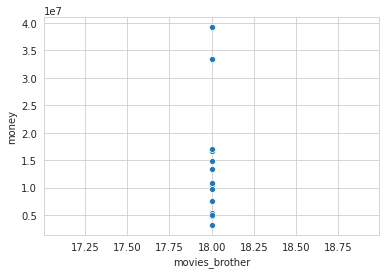

In [249]:
director = gross_director.query("movies_brother == 18")
director
sns.scatterplot(x="movies_brother", y="money", data = director)

# Desafio 6 
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

Filmes mais novos tende a ter o lucro menor, pois tiveram menos tempo para conseguir aumentar este valor. O investimento em filmes aumentou com o passar dos anos. Os filmes que gastam mais tendem a ter um lucro maior.

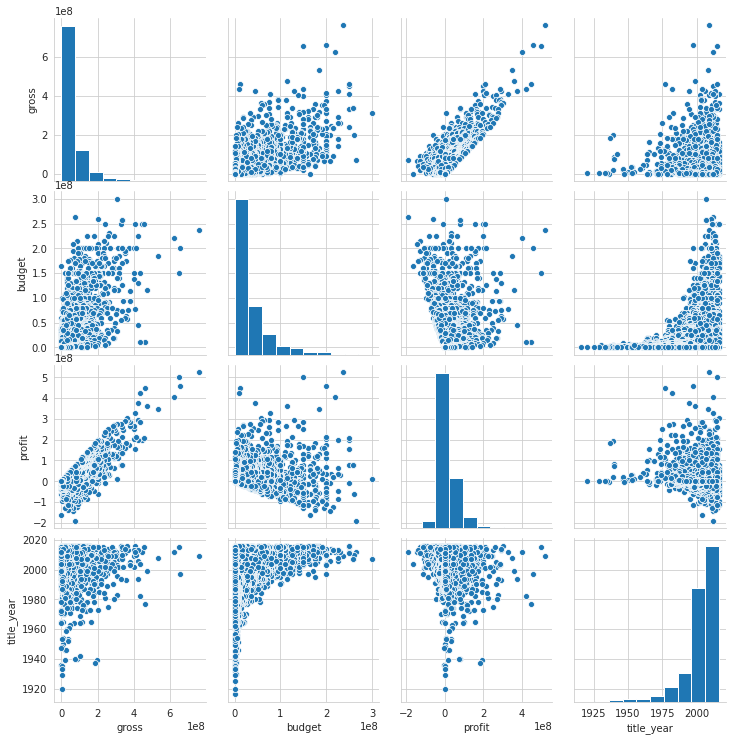

In [250]:
sns.pairplot(data = imdb_usa[["gross", "budget", "profit", "title_year"]])

# Desafio 7 
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

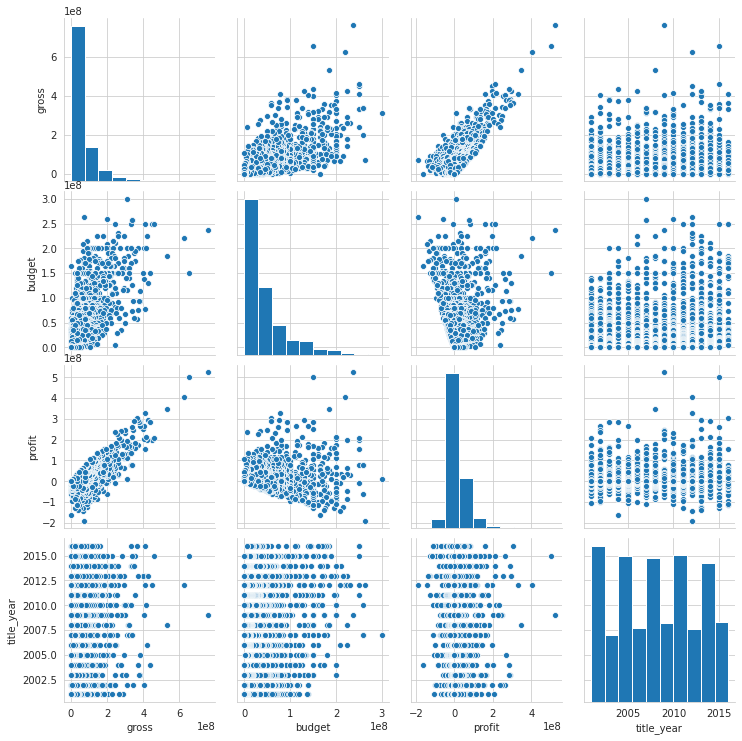

In [251]:
pos = movie_loss.query("budget > 0 | gross > 0").dropna()
pos = pos.query("title_year > 2000")

sns.pairplot(data = pos[["gross", "budget", "profit", "title_year"]])

A correlação mais forte está entre o valor arrecadado e o lucro (**groos X profit**), pois quanto maior o valor arrecadado maior o lucro do filme.

# Desafio 8

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

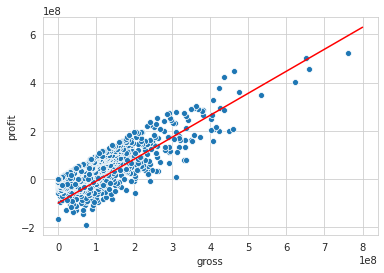

In [252]:
sns.lineplot(x=[0,800000000], y=[-100000000, 630000000], color='red')
sns.scatterplot(x="gross", y="profit", data = movie_loss)

# Desafio 9 

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


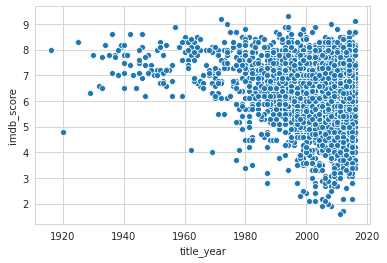

In [253]:
sns.scatterplot(x="title_year", y="imdb_score", data = imdb_usa[["imdb_score", "title_year"]])

Os filmes antigos tem menos avaliações mas suas notas são muito maiores. As notas dos filmes antigos tendem a ser maiores.